In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [69]:
df = pd.read_csv('train.csv')

In [70]:
df.shape

(800, 22)

In [71]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [73]:
# converting the age column to numeric 
df['age'] = df['age'].astype('int')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int32  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [75]:
for col in df.columns:
    not_wanted = ['ID', 'age', 'result']
    if col not in not_wanted:
        print(col, df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [76]:
# the age descent col contain only a item 
df = df.drop(columns = ['ID', 'age_desc'])

In [77]:
df.shape

(800, 20)

In [78]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [79]:
# now there are many countries and also cites which are present in the same country 
# so we can replace the city with the country name

df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [80]:
# define the mapping of countries for country names 

mapping = {
    'Viet Nam': 'Vietnam',
    'AmericanSamoa': 'United States',
    'Hong Kong': 'China'
}

# now replacing the country names by this mapping
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [81]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [82]:
# target class distribution

df['Class/ASD'].value_counts() 

Class/ASD
0    639
1    161
Name: count, dtype: int64

### Exploratory Data Analysis - EDA

In [83]:
df.shape

(800, 20)

In [84]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [85]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [86]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [87]:
sns.set_theme(style= 'darkgrid')

27.96375
24.0


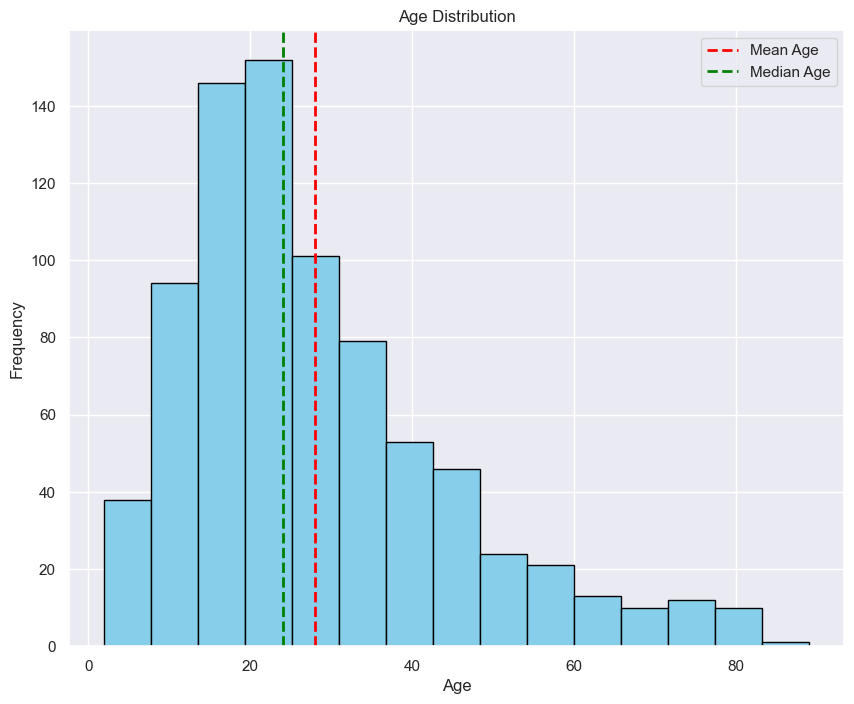

In [88]:
# Histogram for age
plt.figure(figsize=(10, 8))
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')\

## adding the mean and median lines
mean_age = df['age'].mean()
median_age = df['age'].median()

print(mean_age)
print(median_age)

plt.axvline(mean_age, color = 'red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color = 'green', linestyle='dashed', linewidth=2, label='Median Age')
plt.legend()

plt.show()

8.537303106501248
9.605299308


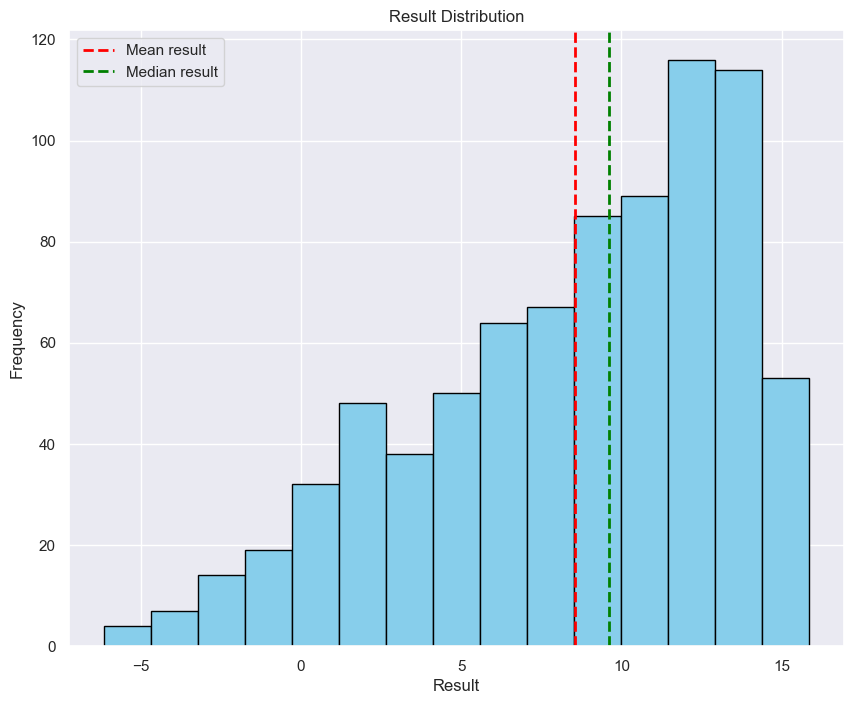

In [89]:
# Histogram for result
plt.figure(figsize=(10, 8))
plt.hist(df['result'], bins=15, color='skyblue', edgecolor='black')
plt.title('Result Distribution')
plt.xlabel('Result')
plt.ylabel('Frequency')

## adding the mean and median lines
mean_result = df['result'].mean()
median_result = df['result'].median()

print(mean_result)
print(median_result)

plt.axvline(mean_result, color = 'red', linestyle='dashed', linewidth=2, label='Mean result')
plt.axvline(median_result, color = 'green', linestyle='dashed', linewidth=2, label='Median result')
plt.legend()

plt.show()

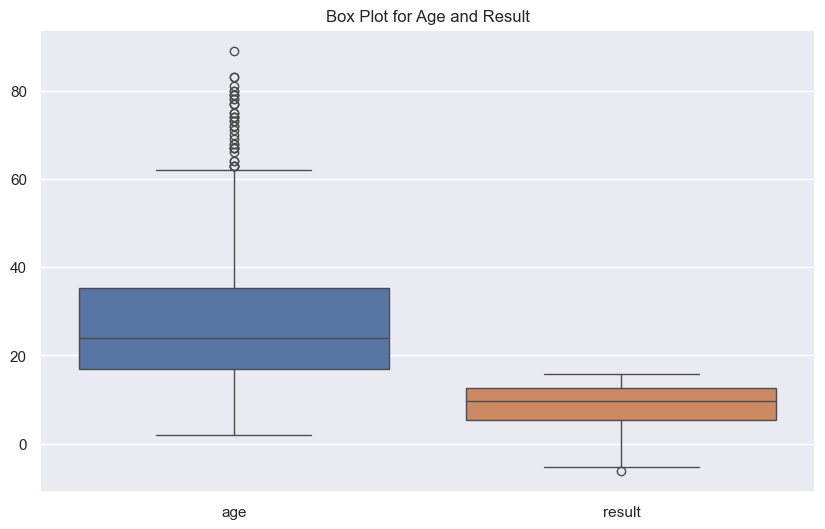

In [90]:
## Box plots for identifying outliers for numeic data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'result']])
plt.title('Box Plot for Age and Result')
plt.show()

In [91]:
## now we are counting the outliers using the IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [92]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [93]:
print(f"Number of outliers in age column: {len(age_outliers)}")

Number of outliers in age column: 39


In [94]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [95]:
print(f"Number of outliers in result column: {len(result_outliers)}")

Number of outliers in result column: 1


In [96]:
## Univaraite analysis of Categorical columns

In [97]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

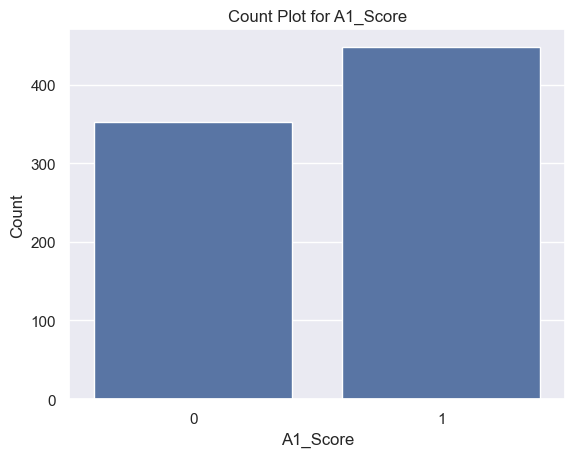

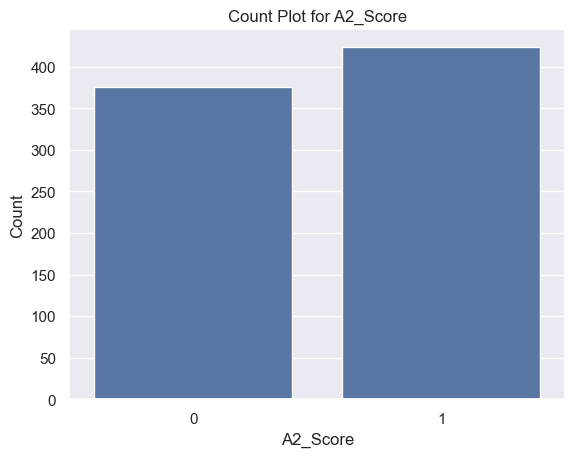

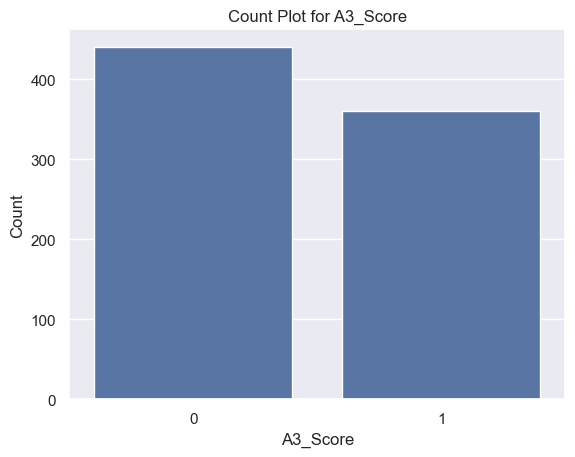

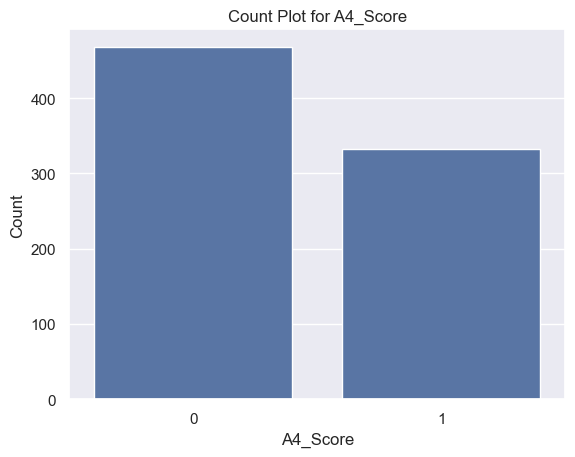

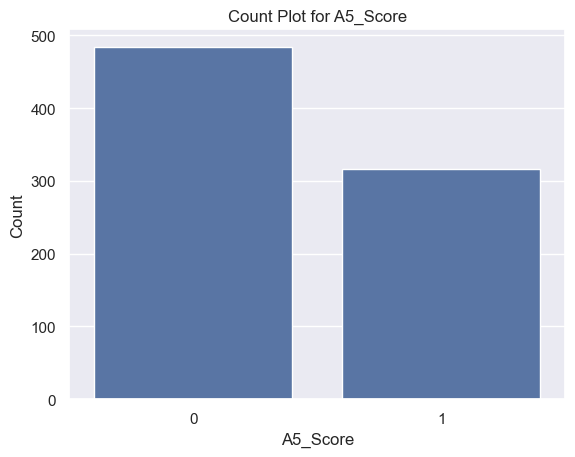

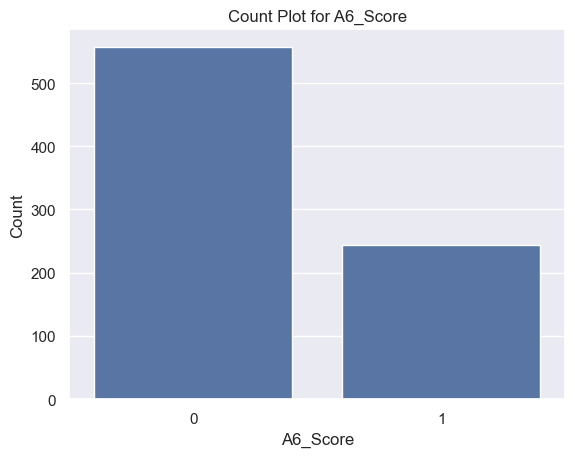

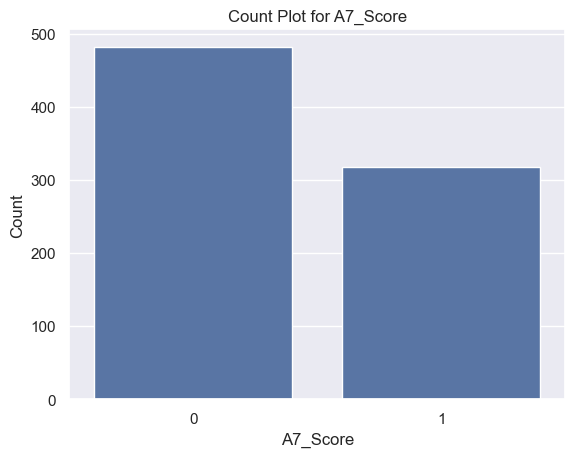

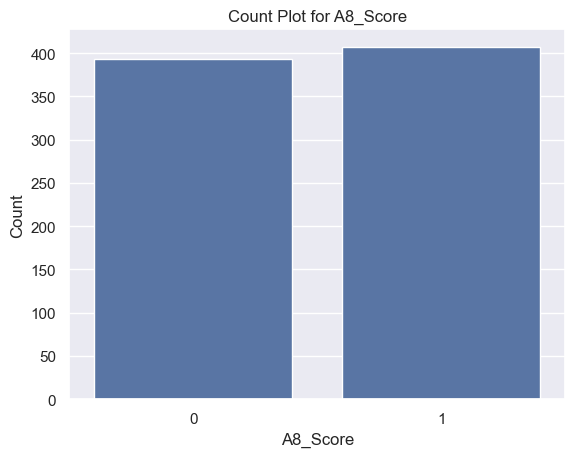

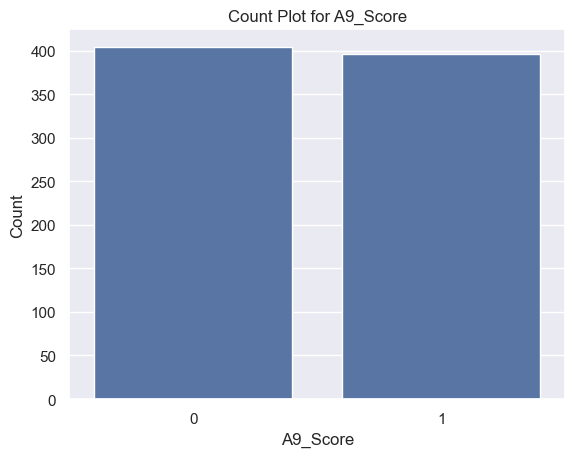

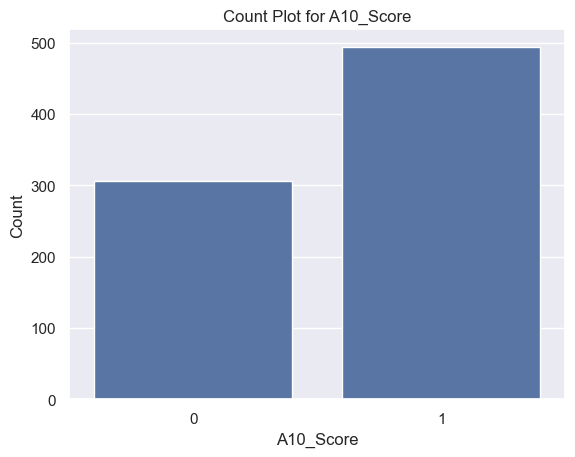

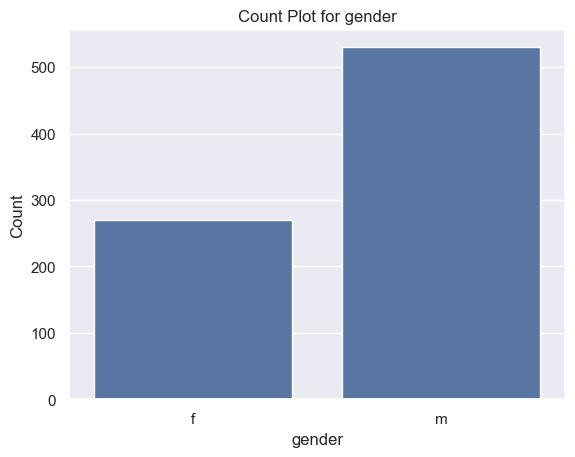

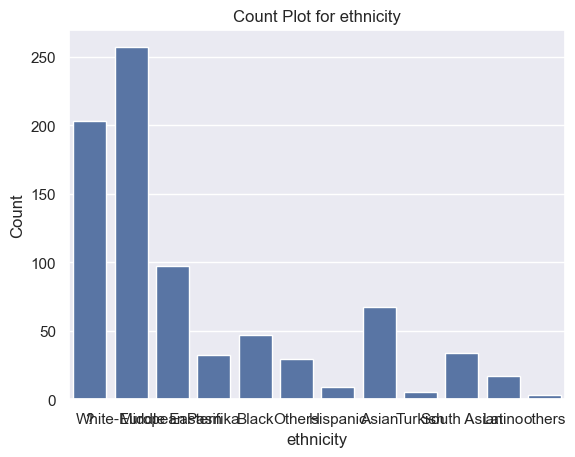

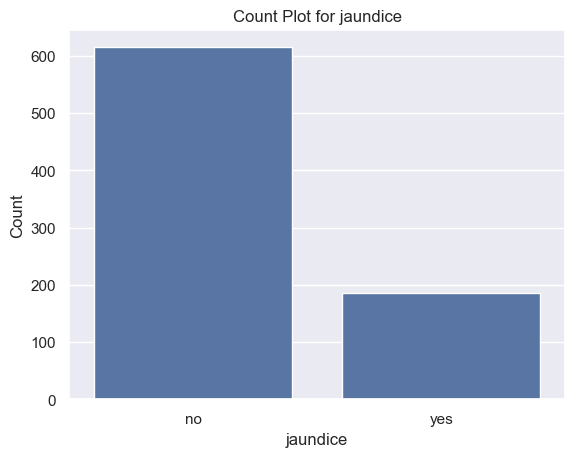

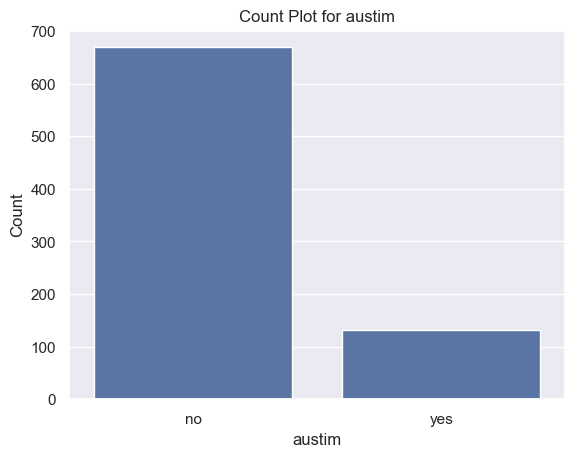

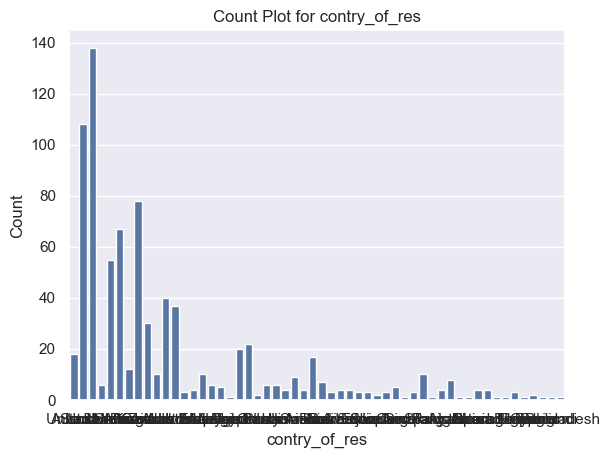

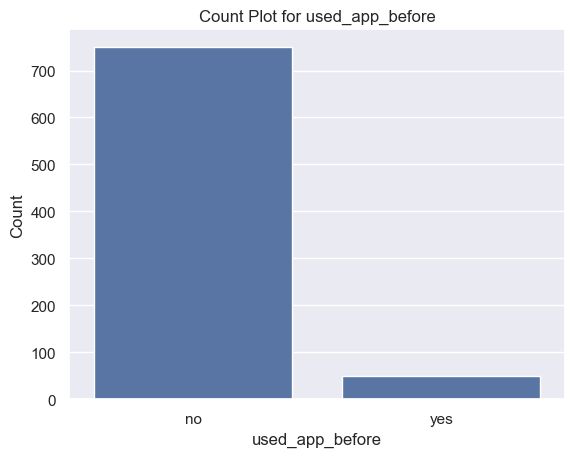

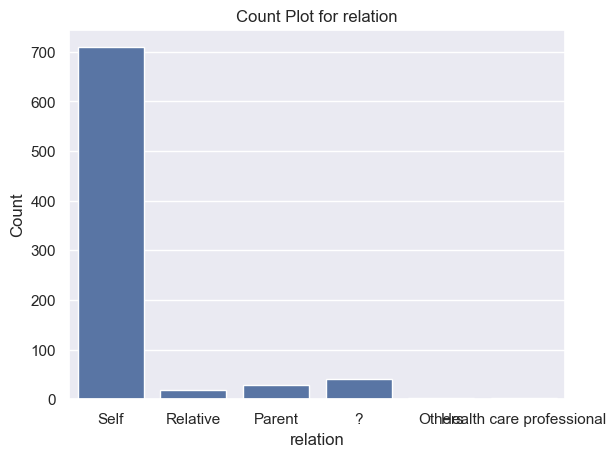

In [98]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

for col in categorical_columns:
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

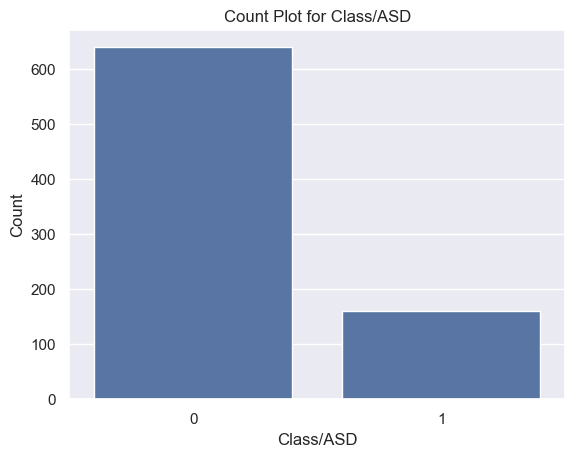

In [99]:
sns.countplot(data=df, x='Class/ASD')
plt.title('Count Plot for Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

In [100]:
df['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [101]:
df['ethnicity'] = df['ethnicity'].replace({'?': "Others", 'others': "Others"})

In [102]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [103]:
df['relation'] = df['relation'].replace({
    '?': 'Others',
    'Relative': 'Others',
    'Parent': 'Others',
    'Health care professional': 'Others',})

In [104]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [105]:
# Label Encoding

In [106]:
object_columns = df.select_dtypes(include=['object']).columns

In [107]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [112]:
encoders = {}

for col in object_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder # saving the encoder for this column

# Saving the encoders to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [113]:
encoders 

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [114]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


### Bivariate Matrix

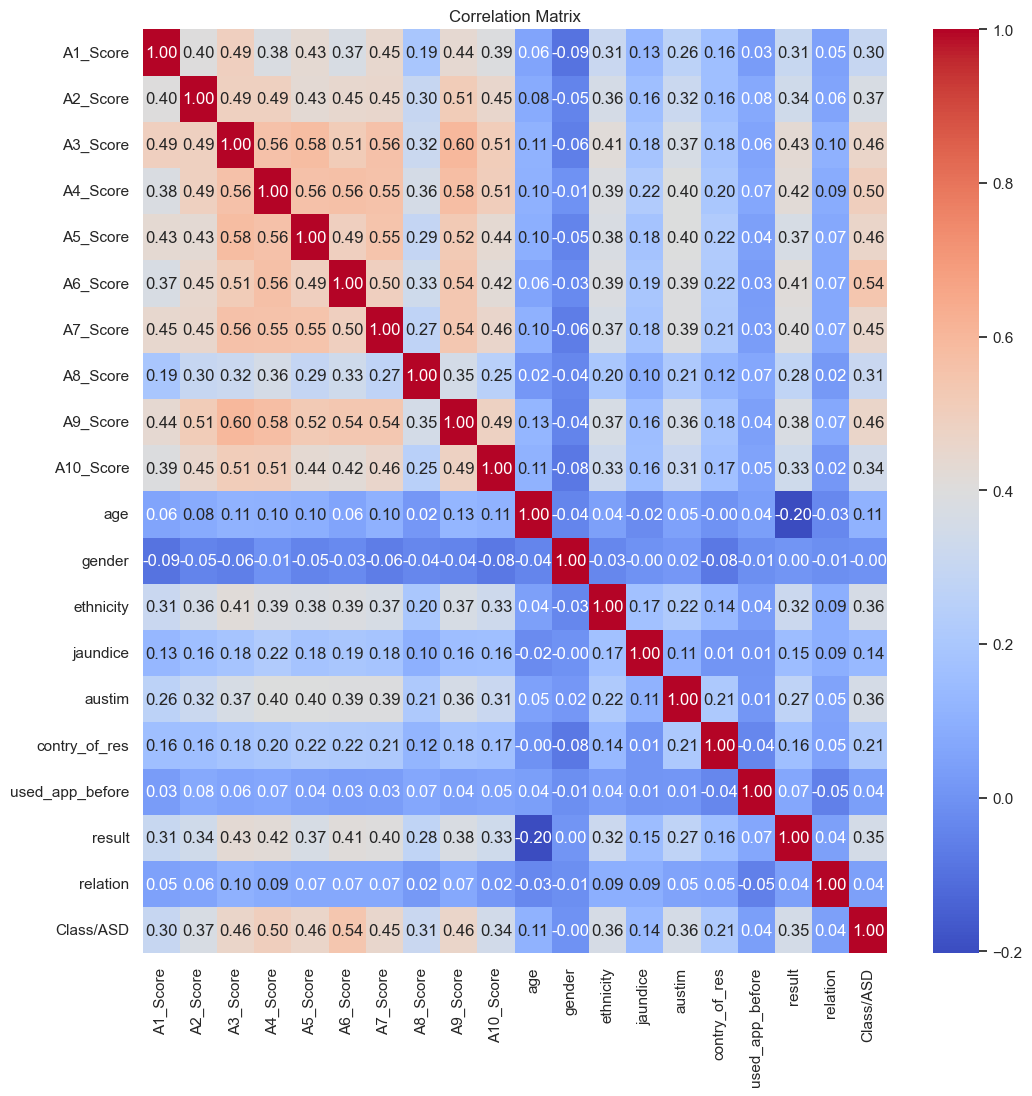

In [118]:
# correlation matrix 
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Insights from EDA
#### There are few outliers in the numerical columns(age, result)
#### There is a class imbalance in the target column
#### There is a class imbalance in the categorical features
#### We don't have any highly correlated column
#### Perfomed label encoding and saved the encoders

In [120]:
## creating a function to replace outliers with median values

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df[column].median()
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

    # df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    # both are correct 
    
    return df

In [121]:
df = replace_outliers_with_median(df, 'age')
df = replace_outliers_with_median(df, 'result')

In [123]:
X = df.drop(columns=['Class/ASD'])
Y = df['Class/ASD']

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [125]:
Y_train.shape, Y_test.shape

((640,), (160,))

In [131]:
Y_train.value_counts()


Class/ASD
0    515
1    125
Name: count, dtype: int64

In [132]:
Y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

In [127]:
# HERE there is a huge data imbalance present hence we are going to use SMOTE to oversample the minority class


## SMOTE
### Synthetic Minority Oversampling Technique

In [128]:
smote = SMOTE(random_state=42)

In [133]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [134]:
print(Y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [135]:
# dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [136]:
# dictionary to save the cross validation scores
cv_scores = {}

# perfrom 5-fold cross validation for each classifier
for name, clf in classifiers.items():  
    print(f"Training {name} with default parameters...")
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} Cross-Validation Scores: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Scores: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Scores: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Scores: 0.90
--------------------------------------------------


In [137]:
print(cv_scores)

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]), 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]), 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}


In [138]:
## doing the model selection and hyperparameter tuning

decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [142]:
# hyper parameter grids for randomized search CV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],    
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],    
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],     
}

In [143]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')

random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=50, cv=5, random_state=42, scoring='accuracy')

random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid_xgb, n_iter=50, cv=5, random_state=42, scoring='accuracy')

In [144]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_xgb.fit(X_train_smote, Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [145]:
# get the model with best parameters 

best_model = None
best_score = 0 

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_  

In [146]:
print(best_model)
print(best_score)

RandomForestClassifier(bootstrap=False, n_estimators=300, random_state=42)
0.9300970873786408


In [147]:
# saving the best model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [148]:
# evaluating on the test data

Y_test_pred = best_model.predict(X_test)

In [149]:
print("accuracy_score:", accuracy_score(Y_test, Y_test_pred))
print("confusion_matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("classification_report:\n", classification_report(Y_test, Y_test_pred))

accuracy_score: 0.8125
confusion_matrix:
 [[108  16]
 [ 14  22]]
classification_report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.58      0.61      0.59        36

    accuracy                           0.81       160
   macro avg       0.73      0.74      0.74       160
weighted avg       0.82      0.81      0.81       160

